(479302, 3)


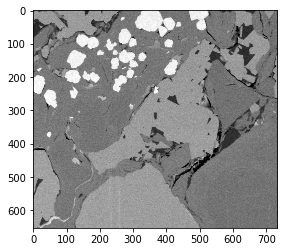

In [36]:


import numpy as np
import cv2
from matplotlib import pyplot as plt

#Use plant cells to demo the GMM on 2 components
#Use BSE_Image to demo it on 4 components
#USe alloy.jpg to demonstrate bic and how 2 is optimal for alloy

img = cv2.imread("Data/BSE.tif")

# Convert MxNx3 image into Kx3 where K=MxN
img2 = img.reshape((-1,3))  #-1 reshape means, in this case MxN
print(img2.shape)
plt.imshow(img)

[5 5 5 ... 0 0 0] (479302,) (653, 734, 3)


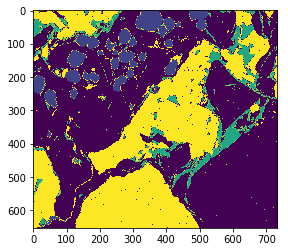

In [32]:
from sklearn.mixture import GaussianMixture as GMM

#covariance choices, full, tied, diag, spherical
gmm_model = GMM(n_components=6, covariance_type='tied').fit(img2)  #tied works better than full
gmm_labels = gmm_model.predict(img2)


#Put numbers back to original shape so we can reconstruct segmented image
original_shape = img.shape


print(gmm_labels, gmm_labels.shape, img.shape)

segmented = gmm_labels.reshape(original_shape[0], original_shape[1])
plt.imshow(segmented)


### NOTE:
* Both BIC and AIC are included as built in methods as part of Scikit-Learn's  GaussianMixture. 
* Therefore we do not need to import any other libraries to compute these. 
* The way you compute them (for example BIC) is by fitting a GMM model and then calling the method BIC. 

-6478479.201634282


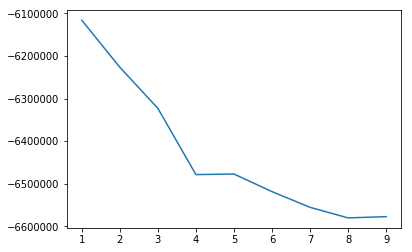

In [56]:
#cv2.imwrite("images/segmented.jpg", segmented)
##############################################################
#How to know the best number of components?
#Using Bayesian information criterion (BIC) to find the best number of components
import numpy as np
import cv2

img = cv2.imread("Data/BSE.tif")
img2 = img.reshape((-1,3))

from sklearn.mixture import GaussianMixture as GMM
n = 4
gmm_model = GMM(n, covariance_type='tied').fit(img2)
#The above line generates GMM model for n=2
#Now let us call the bic method (or aic if you want).

bic_value = gmm_model.bic(img2)  #Remember to call the same model name from above)
print(bic_value)  #You should see bic for GMM model generated using n=2.
#Do this exercise for different n values and plot them to find the minimum.

#Now, to explain m.bic, here are the lines I used in the video. 
n_components = np.arange(1,10)
gmm_models = [GMM(n, covariance_type='tied').fit(img2) for n in n_components]
plt.plot(n_components, [m.bic(img2) for m in gmm_models], label='BIC')

-6478711.894795755


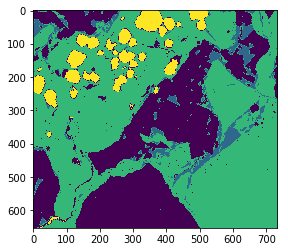

In [68]:
# 2 possible elbow 4 , 8

gm_model=GMM(n_components=4 , covariance_type='tied').fit(img2)
prediction=gmm_model.predict(img2)

pic=prediction.reshape(img.shape[0], img.shape[1])


print(gm_model.aic(img2))
plt.imshow(pic)
                       